<a href="https://colab.research.google.com/github/Emma-Cap/Deep-Learning-Project/blob/main/Full_Coco_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This following code is used to upload the kaggle.json file containing my Kaggle API credentials into the Colab environment. This step is essential to authenticate and access Kaggle datasets directly from Colab.

In [ ]:
from google.colab import files

# Carica il file kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"emmacapel","key":"aa100e4a778233467b73842fb9290ad5"}'}

I want to set up my Kaggle API credentials in Colab. To do this, I create a hidden directory for the kaggle.json file, move the file there, and set the permissions to protect its privacy. This ensures I can securely use the Kaggle API.

In [ ]:
# directory per il file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#  permessi corretti
!chmod 600 ~/.kaggle/kaggle.json

I want to download the COCO 2017 dataset using the Kaggle API. This command allows me to directly access and save the dataset in my Colab environment for further analysis or model training.

The **COCO 2017 dataset** (Common Objects in Context) is a large-scale dataset designed for object detection, segmentation, and captioning tasks. It contains images of complex everyday scenes with objects in their natural context, making it a benchmark for various computer vision tasks.

The dataset is divided into:

- Training Set: Contains over 118,000 images with annotated objects.
- Validation Set: Includes 5,000 images for evaluating models during training.
- Test Set: Comprises around 41,000 unannotated images used for model benchmarking.

The annotations include:

- Object Detection: Bounding boxes around objects with category labels.
- Segmentation: Pixel-level masks for objects to study their precise shapes.
- Captioning: Descriptions of images in natural language to link vision and text.

COCO 2017 is widely used because it has:

- Diversity: Over 80 object categories, including animals, vehicles, and furniture.
- Real-World Complexity: Images with multiple objects, varying sizes, and partial occlusion.
- High-Quality Annotations: Accurate bounding boxes, masks, and keypoints.









In [ ]:
# Scaricare il dataset COCO 2017
!kaggle datasets download -d awsaf49/coco-2017-dataset


Dataset URL: https://www.kaggle.com/datasets/awsaf49/coco-2017-dataset
License(s): CC-BY-SA-4.0
100% 25.0G/25.0G [03:39<00:00, 211MB/s]
100% 25.0G/25.0G [03:39<00:00, 123MB/s]


I want to integrate my Google Drive into the Colab environment to access or save files directly. I mount the Drive to a specific path and check the available storage to ensure I have enough space for my dataset or project files.

In [ ]:
from google.colab import drive

# Monta Google Drive
drive.mount('/content/drive')

# Controllare lo spazio disponibile
!df -h /content/drive

Mounted at /content/drive
Filesystem      Size  Used Avail Use% Mounted on
drive            15G  3.2G   12G  22% /content/drive



I want to extract the COCO 2017 dataset from the downloaded ZIP file. I specify the path to the ZIP file and the destination directory where the dataset should be extracted. This step ensures that the dataset is ready to use for my project. After extraction, I confirm the directory where the files are stored.

In [ ]:
import zipfile

# Percorso del file ZIP scaricato
zip_path = "coco-2017-dataset.zip"

# Percorso della directory in cui estrarre
extract_path = "/content/coco_2017"

# Estrazione del file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset estratto nella directory: {extract_path}")

Dataset estratto nella directory: /content/coco_2017


I want to verify the contents of the directory where I extracted the dataset. Listing the files and folders helps me ensure the dataset was extracted correctly and locate the specific files or directories I need for my project.

In [ ]:
# Controllare cosa c'è nella directory principale
print("Contenuto della directory principale:", os.listdir(extract_path))

Contenuto della directory principale: ['coco2017']


In [ ]:
# Percorso alla sottocartella coco2017
coco2017_dir = os.path.join(extract_path, "coco2017")

# Controlla il contenuto della sottocartella coco2017
print("Contenuto della sottocartella coco2017:", os.listdir(coco2017_dir))


Contenuto della sottocartella coco2017: ['val2017', 'test2017', 'annotations', 'train2017']



This step defines the paths to important directories within the extracted COCO 2017 dataset, such as annotations, training, validation, and test image directories. Printing these paths helps verify the dataset structure and ensures that the files are accessible for further processing.

In [ ]:
# Percorsi aggiornati
annotations_dir = os.path.join(coco2017_dir, "annotations")
train_images_dir = os.path.join(coco2017_dir, "train2017")
val_images_dir = os.path.join(coco2017_dir, "val2017")
test_images_dir = os.path.join(coco2017_dir, "test2017")

# Controlla i percorsi aggiornati
print("Percorso annotations:", annotations_dir)
print("Percorso training:", train_images_dir)
print("Percorso validation:", val_images_dir)
print("Percorso test:", test_images_dir)


Percorso annotations: /content/coco_2017/coco2017/annotations
Percorso training: /content/coco_2017/coco2017/train2017
Percorso validation: /content/coco_2017/coco2017/val2017
Percorso test: /content/coco_2017/coco2017/test2017



This next step inspects the dataset to ensure everything is properly organised and complete. It lists the contents of the annotations directory and calculates the number of images in the training, validation, and test directories. This verification step ensures that the dataset is correctly structured and ready for further processing or model training.

In [ ]:
# Controllare i contenuti delle directory
print("Contenuto della cartella annotations:", os.listdir(annotations_dir))
print("Numero di immagini in training:", len(os.listdir(train_images_dir)))
print("Numero di immagini in validation:", len(os.listdir(val_images_dir)))
print("Numero di immagini in test:", len(os.listdir(test_images_dir)))


Contenuto della cartella annotations: ['instances_val2017.json', 'person_keypoints_train2017.json', 'captions_train2017.json', 'captions_val2017.json', 'instances_train2017.json', 'person_keypoints_val2017.json']
Numero di immagini in training: 118287
Numero di immagini in validation: 5000
Numero di immagini in test: 40670


In [ ]:
# Lista dei file nella cartella annotations
print("File nella cartella annotations:", os.listdir(annotations_dir))


File nella cartella annotations: ['instances_val2017.json', 'person_keypoints_train2017.json', 'captions_train2017.json', 'captions_val2017.json', 'instances_train2017.json', 'person_keypoints_val2017.json']



The training annotations from the instances_train2017.json file are loaded to extract and analyse category information. The script calculates the total number of categories and lists their IDs and names, providing a clear overview of the dataset's object classes for detection and classification tasks.

In [ ]:
import json

# Percorso al file delle annotazioni di training
train_annotations_path = os.path.join(annotations_dir, "instances_train2017.json")

# Carica il file delle annotazioni
with open(train_annotations_path, 'r') as f:
    train_annotations = json.load(f)

# Estrarre le categorie
categories = train_annotations['categories']

# Numero totale di categorie
print("Numero di categorie:", len(categories))

# Visualizza tutte le categorie disponibili
for category in categories:
    print(f"ID: {category['id']}, Nome: {category['name']}")


Numero di categorie: 80
ID: 1, Nome: person
ID: 2, Nome: bicycle
ID: 3, Nome: car
ID: 4, Nome: motorcycle
ID: 5, Nome: airplane
ID: 6, Nome: bus
ID: 7, Nome: train
ID: 8, Nome: truck
ID: 9, Nome: boat
ID: 10, Nome: traffic light
ID: 11, Nome: fire hydrant
ID: 13, Nome: stop sign
ID: 14, Nome: parking meter
ID: 15, Nome: bench
ID: 16, Nome: bird
ID: 17, Nome: cat
ID: 18, Nome: dog
ID: 19, Nome: horse
ID: 20, Nome: sheep
ID: 21, Nome: cow
ID: 22, Nome: elephant
ID: 23, Nome: bear
ID: 24, Nome: zebra
ID: 25, Nome: giraffe
ID: 27, Nome: backpack
ID: 28, Nome: umbrella
ID: 31, Nome: handbag
ID: 32, Nome: tie
ID: 33, Nome: suitcase
ID: 34, Nome: frisbee
ID: 35, Nome: skis
ID: 36, Nome: snowboard
ID: 37, Nome: sports ball
ID: 38, Nome: kite
ID: 39, Nome: baseball bat
ID: 40, Nome: baseball glove
ID: 41, Nome: skateboard
ID: 42, Nome: surfboard
ID: 43, Nome: tennis racket
ID: 44, Nome: bottle
ID: 46, Nome: wine glass
ID: 47, Nome: cup
ID: 48, Nome: fork
ID: 49, Nome: knife
ID: 50, Nome: spoon



The analysis identifies the ten most frequent categories in the training dataset by counting annotations for each category. Their IDs and corresponding names are extracted to highlight the most represented object classes, offering valuable insights for model training and dataset exploration.

In [ ]:
from collections import Counter

# Conta il numero di annotazioni per ogni categoria
category_counts = Counter([ann['category_id'] for ann in train_annotations['annotations']])

# Ottieni le 10 categorie più popolose
most_popular_categories = category_counts.most_common(10)

# ID delle 10 categorie più popolose
selected_category_ids = [cat[0] for cat in most_popular_categories]
print("ID delle 10 categorie più popolose:", selected_category_ids)

# Nome delle 10 categorie più popolose
id_to_name = {cat['id']: cat['name'] for cat in categories}
selected_category_names = [id_to_name[cid] for cid in selected_category_ids]
print("Nomi delle 10 categorie più popolose:", selected_category_names)


ID delle 10 categorie più popolose: [1, 3, 62, 84, 44, 47, 67, 51, 10, 31]
Nomi delle 10 categorie più popolose: ['person', 'car', 'chair', 'book', 'bottle', 'cup', 'dining table', 'bowl', 'traffic light', 'handbag']


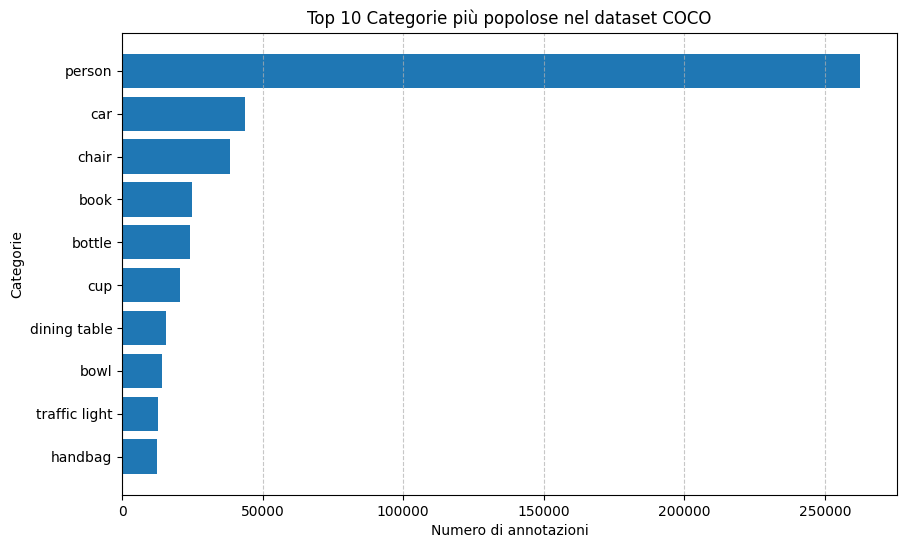

In [ ]:
import matplotlib.pyplot as plt

# Estrai le categorie e i loro conteggi dal Counter
category_names = [id_to_name[cid] for cid, _ in category_counts.most_common(10)]
category_sizes = [count for _, count in category_counts.most_common(10)]

# Creazione del grafico a barre
plt.figure(figsize=(10, 6))
plt.barh(category_names, category_sizes, align='center')
plt.xlabel('Numero di annotazioni')
plt.ylabel('Categorie')
plt.title('Top 10 Categorie più popolose nel dataset COCO')
plt.gca().invert_yaxis()  # Inverti l'ordine per avere la barra più grande in cima
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## **Analyze both training and validation test**

This section prepares for a deeper analysis of the COCO 2017 dataset by loading both training and validation annotations. It creates a mapping between category IDs and their corresponding names, facilitating easier identification and visualisation of dataset categories in subsequent steps.

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Percorsi ai file di annotazione
annotations_dir = os.path.join(coco2017_dir, "annotations")
train_annotations_path = os.path.join(annotations_dir, "instances_train2017.json")
val_annotations_path = os.path.join(annotations_dir, "instances_val2017.json")

# Carica le annotazioni di training e validation
with open(train_annotations_path, 'r') as f:
    train_annotations = json.load(f)

with open(val_annotations_path, 'r') as f:
    val_annotations = json.load(f)

# Mappa ID -> Nome delle categorie
id_to_name = {cat['id']: cat['name'] for cat in train_annotations['categories']}


In [ ]:
# Combina le annotazioni
all_annotations = train_annotations['annotations'] + val_annotations['annotations']

# Conta le annotazioni per categoria nel dataset combinato
category_counts_all = Counter([ann['category_id'] for ann in all_annotations])

# Top 10 categorie più numerose
category_names_all = [id_to_name[cid] for cid, _ in category_counts_all.most_common(10)]
category_sizes_all = [count for _, count in category_counts_all.most_common(10)]


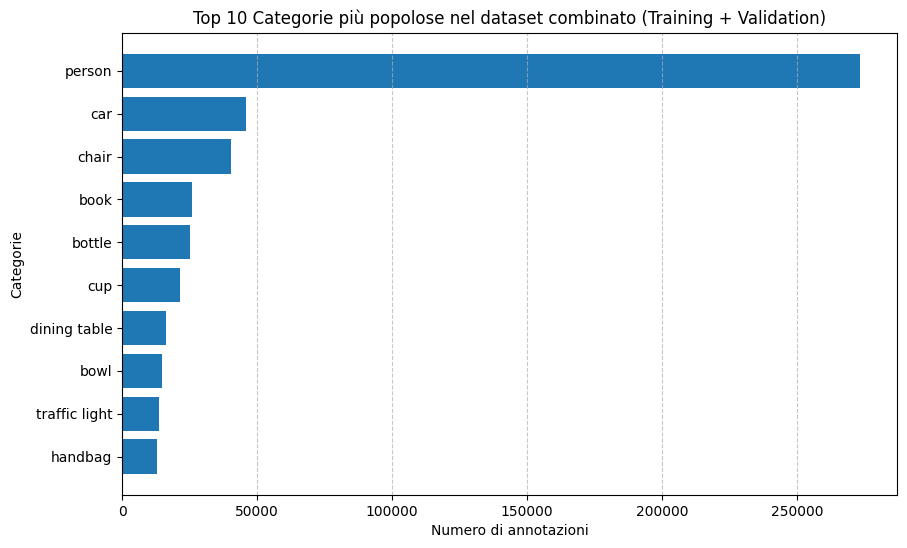

In [ ]:
# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.barh(category_names_all, category_sizes_all, align='center')
plt.xlabel('Numero di annotazioni')
plt.ylabel('Categorie')
plt.title('Top 10 Categorie più popolose nel dataset combinato (Training + Validation)')
plt.gca().invert_yaxis()  # Inverti l'ordine delle categorie
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Numero totale di annotazioni nel dataset combinato
total_annotations_combined = len(all_annotations)

print(f"Numero totale di annotazioni (bounding boxes) nel dataset combinato (training + validation): {total_annotations_combined}")


Numero totale di annotazioni (bounding boxes) nel dataset combinato (training + validation): 896782



Below I selected the first five images from both the training and validation sets of the COCO dataset and displays them in a grid layout. It combines these images and organises them into two rows and five columns, with the first row showing training images and the second row showing validation images. The Matplotlib library is used to visualise the images, with titles distinguishing between training and validation sets, providing a clear and structured preview of the dataset's content.

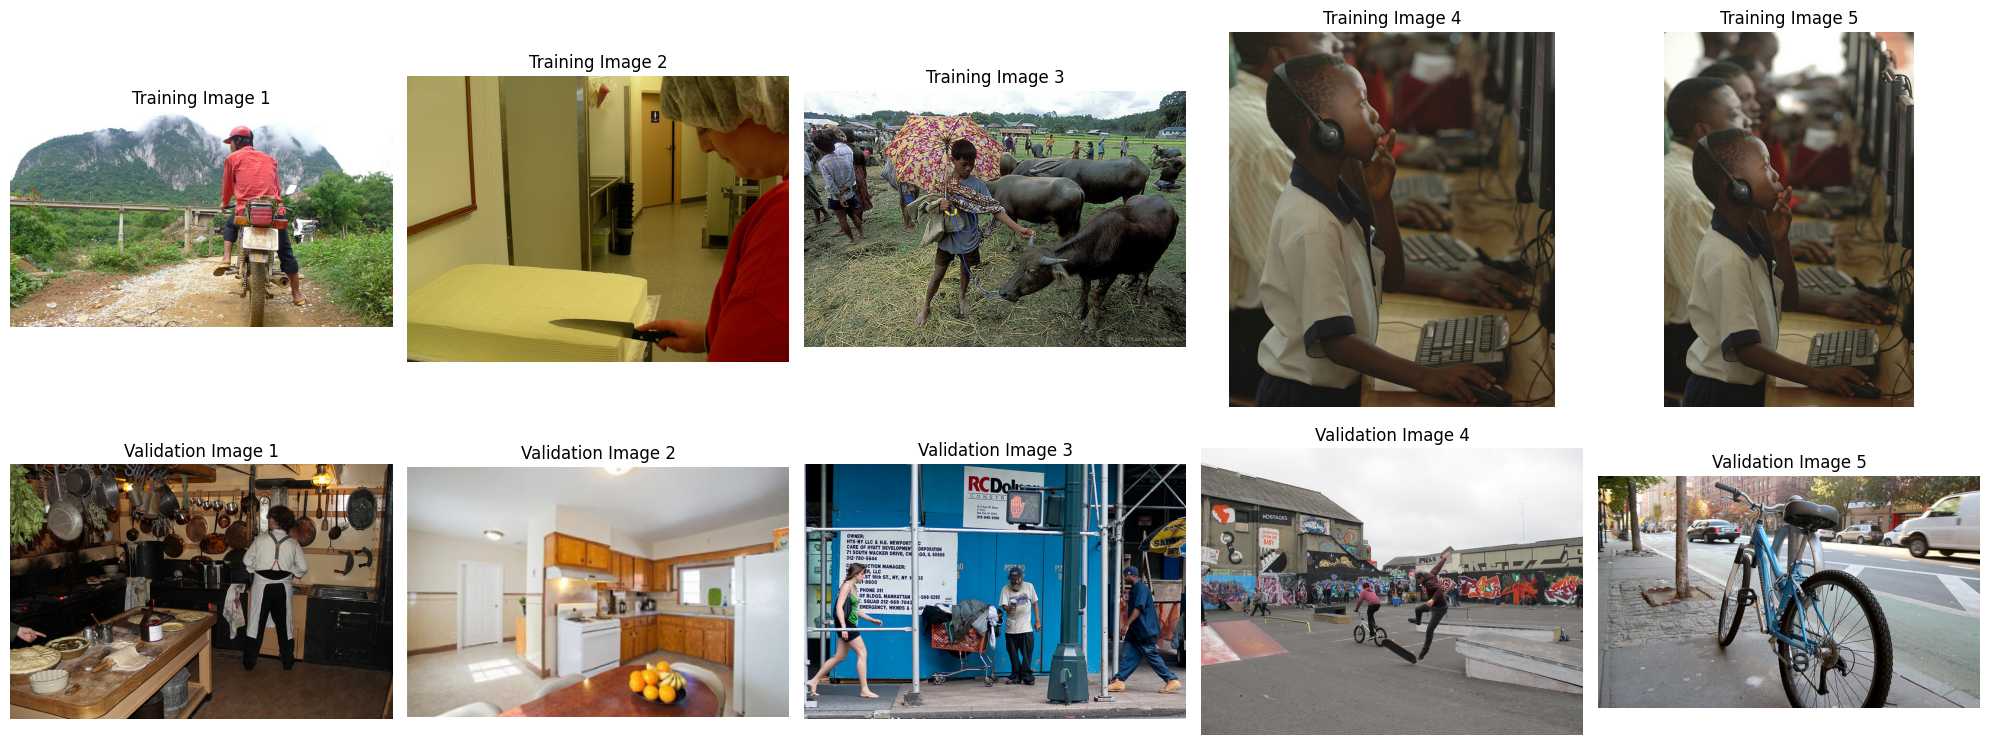

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Directory immagini di training e validation
train_images_dir = os.path.join(coco2017_dir, "train2017")
val_images_dir = os.path.join(coco2017_dir, "val2017")

# Seleziona le prime 5 immagini di training e le prime 5 di validation
train_images = [os.path.join(train_images_dir, img['file_name']) for img in train_annotations['images'][:5]]
val_images = [os.path.join(val_images_dir, img['file_name']) for img in val_annotations['images'][:5]]

# Combina le immagini di training e validation
all_images_to_display = train_images + val_images

# Crea un grafico con le immagini (2 righe, 5 colonne)
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i, ax in enumerate(axes.flatten()):
    if i < len(all_images_to_display):  # Assicurati di non superare il numero di immagini
        img_path = all_images_to_display[i]
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.axis('off')  # Rimuove gli assi
        # Aggiungi titolo per distinguere training e validation
        if i < 5:
            ax.set_title(f"Training Image {i+1}")
        else:
            ax.set_title(f"Validation Image {i-4}")
    else:
        ax.axis('off')  # Nasconde assi vuoti

plt.tight_layout()
plt.show()



The following code identifies images containing at least one of the top 10 most frequent categories from the COCO dataset. It selects up to 10 such images, retrieves their details, and determines their file paths based on whether they belong to the training or validation set. Finally, it visualises these images in a grid layout (2 rows and 5 columns) using Matplotlib, providing a quick overview of the dataset's visual content for the most common categories.

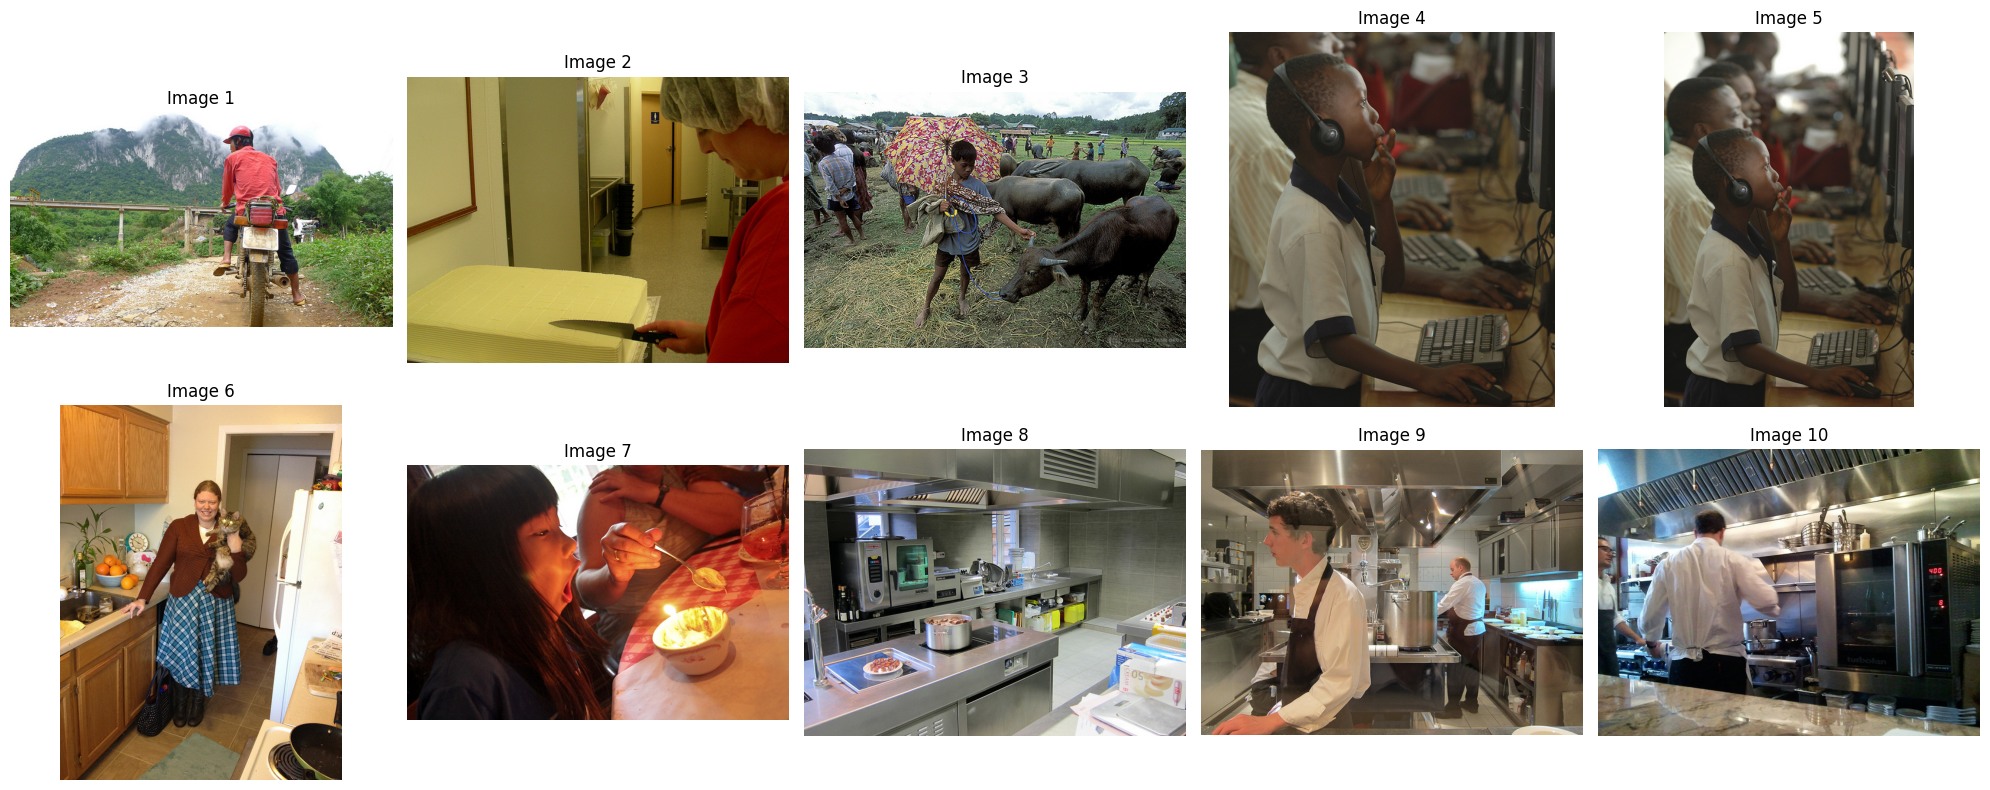

In [ ]:
# Ottieni gli ID delle top 10 categorie
top_10_categories_ids = [cid for cid, _ in category_counts_all.most_common(10)]

# Trova immagini che contengono almeno una delle categorie selezionate
images_with_top_10_categories = []
for ann in all_annotations:
    if ann['category_id'] in top_10_categories_ids:
        img_id = ann['image_id']
        if img_id not in images_with_top_10_categories:
            images_with_top_10_categories.append(img_id)

# Ottieni i dettagli delle immagini
images_details = [
    img for img in train_annotations['images'] + val_annotations['images']
    if img['id'] in images_with_top_10_categories
][:10]  # Seleziona le prime 10 immagini

# Percorsi delle immagini selezionate
images_to_display = [
    os.path.join(train_images_dir if img['file_name'] in os.listdir(train_images_dir) else val_images_dir, img['file_name'])
    for img in images_details
]

# Visualizza le immagini (2 righe, 5 colonne)
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i, ax in enumerate(axes.flatten()):
    if i < len(images_to_display):  # Mostra solo le immagini presenti
        img_path = images_to_display[i]
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.axis('off')  # Rimuove gli assi
        ax.set_title(f"Image {i+1}")  # Titolo generico
    else:
        ax.axis('off')  # Nasconde assi vuoti

plt.tight_layout()
plt.show()


## **New Dataset**

The goal is to create a simplified version of the COCO dataset that focuses on the top 10 most frequent categories. This reduction makes the dataset more manageable for experiments or smaller-scale training while preserving a diverse and representative sample of the key categories.

*Criteria for Dataset Creation*:

- Category Selection: Include only the top 10 most frequent categories based on the annotations.

- Image Limitation: Limit the number of images to a maximum of 900 per category to ensure balanced representation and avoid dataset inflation.

- Annotation Filtering: Select one annotation per image, ensuring only the relevant object (from the top 10 categories) is included.

- Image Source: Use images from both the training and validation sets of the original COCO dataset.

*New Dataset Structure*:
- images/: Folder with all selected images.
- annotations.json: A JSON file with updated annotations for the selected images and categories.

*Storage and Sharing*: Compress the dataset into a ZIP file for easy sharing and upload it to Google Drive for secure storage and access.

*Why Create a Simplified Dataset*:
- Efficiency: Reducing the dataset size accelerates model training and testing.
- Focus: Narrowing down to key categories helps in analysing specific use cases or tasks.
- Accessibility: A compact dataset is easier to handle for systems with limited computational resources.
- Balanced Training: Limiting images per category ensures a balanced representation, preventing bias towards over-represented categories.





Adesso è necessario creare un nuovo dataset, con le 10 top categorie e per ciascuna 900 immagini

In [ ]:
import shutil
import random

# Directory per il nuovo dataset semplificato
simplified_dataset_dir = "/content/simplified_dataset"
os.makedirs(simplified_dataset_dir, exist_ok=True)

# Directory per le immagini semplificate
images_dir = os.path.join(simplified_dataset_dir, "images")
os.makedirs(images_dir, exist_ok=True)

# Creare un nuovo file di annotazioni
new_annotations = {
    "images": [],
    "annotations": [],
    "categories": [cat for cat in train_annotations['categories'] if cat['id'] in top_10_categories_ids],
}

# Traccia immagini per categoria
images_per_category = {cat_id: 0 for cat_id in top_10_categories_ids}
used_images = set()

# Filtra immagini e annotazioni
for ann in all_annotations:
    cat_id = ann['category_id']
    img_id = ann['image_id']

    # Limita a 900 immagini per categoria
    if cat_id in top_10_categories_ids and images_per_category[cat_id] < 900:
        # Trova i dettagli dell'immagine
        img_data = next(
            (img for img in train_annotations['images'] + val_annotations['images'] if img['id'] == img_id),
            None
        )

        if img_data and img_data['id'] not in used_images:
            # Seleziona solo un'annotazione per immagine
            matching_annotations = [a for a in all_annotations if a['image_id'] == img_id]
            selected_annotation = random.choice(matching_annotations)

            # Aggiorna l'annotazione per includere solo l'oggetto selezionato
            selected_annotation['category_id'] = selected_annotation['category_id']
            selected_annotation['bbox'] = selected_annotation['bbox']
            selected_annotation['image_id'] = img_id

            # Percorso immagine sorgente
            src_path = os.path.join(
                train_images_dir if img_data['file_name'] in os.listdir(train_images_dir) else val_images_dir,
                img_data['file_name']
            )
            dst_path = os.path.join(images_dir, img_data['file_name'])

            # Copia immagine e aggiorna annotazioni
            if os.path.exists(src_path):
                shutil.copy(src_path, dst_path)
                new_annotations['images'].append(img_data)
                new_annotations['annotations'].append(selected_annotation)
                used_images.add(img_data['id'])
                images_per_category[cat_id] += 1

# Salva il file di annotazioni filtrate
new_annotations_path = os.path.join(simplified_dataset_dir, "annotations.json")
with open(new_annotations_path, 'w') as f:
    json.dump(new_annotations, f)

print(f"Nuovo dataset creato con successo in: {simplified_dataset_dir}")

# Comprimi il dataset in un file zip
output_zip_path = "/content/simplified_dataset.zip"
shutil.make_archive(output_zip_path.replace(".zip", ""), 'zip', simplified_dataset_dir)

print(f"Dataset compresso e salvato in: {output_zip_path}")

# Monta Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Sposta il file zip nel Drive
shutil.move(output_zip_path, "/content/drive/MyDrive/simplified_dataset.zip")
print("Dataset salvato nel tuo Google Drive come 'simplified_dataset.zip'")


Nuovo dataset creato con successo in: /content/simplified_dataset
Dataset compresso e salvato in: /content/simplified_dataset.zip
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset salvato nel tuo Google Drive come 'simplified_dataset.zip'


In [ ]:
# Percorso del dataset semplificato
simplified_dataset_dir = "/content/simplified_dataset"

# Controlla il contenuto della directory
print("Contenuto della directory simplified_dataset:", os.listdir(simplified_dataset_dir))


Contenuto della directory simplified_dataset: ['annotations.json', 'images']


In [ ]:
annotations_path = os.path.join(simplified_dataset_dir, "annotations.json")
if os.path.exists(annotations_path):
    print(f"File delle annotazioni trovato: {annotations_path}")
else:
    print("Il file delle annotazioni non esiste!")


File delle annotazioni trovato: /content/simplified_dataset/annotations.json


In [ ]:
# Mostra le prime 5 annotazioni
print("Esempio di annotazioni:")
for annotation in new_annotations['annotations'][:5]:
    print(annotation)

# Mostra le prime 5 immagini con i relativi dettagli
print("\nEsempio di immagini:")
for image in new_annotations['images'][:5]:
    print(image)

# Mostra le categorie presenti nel dataset
print("\nCategorie presenti nel dataset:")
for category in new_annotations['categories']:
    print(category)


Esempio di annotazioni:
{'segmentation': [[347.08, 236.44, 342.32, 201.72, 340.27, 194.57, 300.45, 200.7, 300.45, 218.4, 302.84, 220.44, 311.34, 220.1, 323.26, 219.76, 322.58, 225.21, 330.06, 221.8, 335.51, 223.85, 339.25, 233.72, 341.3, 236.44]], 'area': 1138.5476, 'iscrowd': 0, 'image_id': 538934, 'bbox': [300.45, 194.57, 46.63, 41.87], 'category_id': 79, 'id': 2228460}
{'segmentation': [[214.09, 88.32, 216.1, 85.81, 219.28, 84.81, 222.46, 83.81, 225.47, 83.81, 228.81, 84.81, 232.16, 86.65, 234.16, 89.66, 235.67, 95.35, 236.34, 99.36, 234.16, 104.21, 231.49, 106.89, 229.15, 108.23, 225.63, 108.56, 221.62, 108.06, 217.94, 106.22, 215.1, 104.05, 213.76, 99.86, 212.92, 94.51, 213.76, 89.49]], 'area': 459.09710000000007, 'iscrowd': 0, 'image_id': 241844, 'bbox': [212.92, 83.81, 23.42, 24.75], 'category_id': 85, 'id': 336161}
{'segmentation': [[173.11, 338.79, 178.13, 338.92, 178.64, 315.01, 172.73, 314.24, 170.8, 315.27, 171.7, 319.9, 171.19, 322.6, 171.31, 325.42, 170.03, 327.61, 169.0,

In [ ]:
import shutil

# Percorso del file ZIP
output_zip_path = "/content/simplified_dataset.zip"

# Comprimi la cartella simplified_dataset in un file ZIP
shutil.make_archive(output_zip_path.replace(".zip", ""), 'zip', "/content/simplified_dataset")
print(f"Dataset compresso e salvato in: {output_zip_path}")


Dataset compresso e salvato in: /content/simplified_dataset.zip
